In order to successfully complete this assignment you need to:
1. Participate both individually and in groups during class.
2. Submit this notebook to the `exercise` folder in your `cmse802-yourlastname` repository by 10pm __the SAME DAY of the class__. Late assignment will receive <=80% of the grade.

### <p style="text-align: left;"> &#9989; Put your name here: Pavan Yachamaneni </p>

---
# __Artificial Neural Network 1: In-Class__

<img src= "https://storage.googleapis.com/kaggle-datasets-images/2243/3791/9384af51de8baa77f6320901f53bd26b/dataset-cover.png" width="700">

The [Fashion MNIST dataset from Kaggle](https://www.kaggle.com/datasets/zalando-research/fashionmnist) we will be playing with today


## Learning objectives

At the end of the exercise, you should be able to:
- Load existing Tensorflow dataset.
- Visualize image data as tensors.
- Build a simple ANN model using KERAS through Tensorflow.
- Evaluate an ANN model with test data.
- Compile a function that consists of the entire ANN modeling pipeline.

## Goals

1. [Review pre-class assignment](#preclass)
1. [Fashion MNIST dataset](#dataset)
1. [Building an ANN classification model](#model)
1. [Putting things together](#together)

----
<a name="preclass"></a>

# 1. Pre-Class Assignment Review

Keep in mind that the pre-class content is only the 1st half of the neural network:
- We take a guess at what the weights $W$ are.
- Forward propagate to get the initial output.
- This initial output is going to be terrible.

Then a few really imporant things need to be done so we can improve upon our intial guess:
1. Define cost function: allow us to gauge just how wrong (or costly) our predictions ($\hat{y}$) are compared to the true values ($y$).
2. Improve model by minimizing cost: this is done by finding better $W$ and one efficient approach is gradient descent.
3. Back-propagate errors (costs) to each weight: weights contribute more to the errors will be changed more during gradient descent.

Through the above process, we can find better $W$ for predicting $y$. The above three topics will be covered in the next pre-class exercise.

In your group, discussion the following.

&#9989; <font color=red>**QUESTION:**</font> Did you get stuck doing pre-class exercise or find some ideas confusing? If so where did you get stuck? What did you find confusing? What solutions did your groupmates suggest?

<font size=+3>&#9998;</font> Stuck at nowhere!

---
<a name="dataset"></a>
# 2. The Fashion MNIST dataset

Enough theory for now. Let's do something practical using ANN with [Pytorch](https://pytorch.org/tutorials/). 

In [16]:
#import torch
import torch
import numpy as np
import torchvision.datasets as datasets
from torchvision import transforms
fashion_train_data  =  datasets.FashionMNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
fashion_test_data  =  datasets.FashionMNIST(root='./data', train=False, download=True, transform=None)



## 2.1 The fashion MINST dataset



We will use the [Fashion MINST](https://www.tensorflow.org/datasets/catalog/fashion_mnist) data set containing images of different kind of outfits. __Our goal here is to classify an image into one of 10 outfit class (e.g., Dress, Trouser, Shirt).__

Note: MINST stands for Modified National Institute of Standards and Technology.

&#9989; **<font color=blue>DO THIS:</font>** Load the dataset and write code to:
1. Show the type of `X_train` and `y_train`
1. Show the dimension of `X_train` and `y_train`.

In [17]:
X_train = fashion_train_data.data
y_train = fashion_train_data.targets
X_test = fashion_test_data.data
y_test = fashion_test_data.targets
# put your code below
print(type(X_train))
print(type(y_train))
print(X_train.shape)
print(y_train.shape)

<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([60000, 28, 28])
torch.Size([60000])


&#9989; **<font color=blue>DO THIS:</font>** If your code above is correct, then you must have seen that the data type of `X_train` is `torch.Tensor`, what is it? Well, tensor is just another name for data arrays. So here we just encountered a new data type `torch.Tensor` that comes with the package pytorch, just like the np.array datatype that comes with the package numpy. Similar to numpy, pytorch also defines a special set of commands that only apply to `torch.Tensor`. For example, the command for finding the minimal value of an np.array is `numpy.min`, but when you want to find the minimal value of an array stored as type `torch.tensor`, you should use `torch.min` instead. 

1. Print out the min and max values in `X_train`.
1. Print out the unique values in `y_train` (try to search online for the correct command).

In [18]:
# put your code below
torch.unique(y_train)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [19]:
torch.min(X_train)

tensor(0, dtype=torch.uint8)

So, in this dataset:
- There are 60,000 training images.
- There are 10,000 testing images.
- Each image is a 28x28 pixel image.
- Each pixel has a value from 0 to 255.
- These images are features.
- There are 10 classes with names from 0 to 9.

&#9989; **<font color=blue>DO THIS:</font>** Let's normalize the value range from 0-255 to 0-1.

In [20]:
X_train = X_train/255
X_test  = X_test/255

&#9989; **<font color=blue>DO THIS:</font>** Show 5 examples

In [21]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE" # This line prevents python from crushing when
 #using pyplot.imshow to plot torch.Tensor type of images

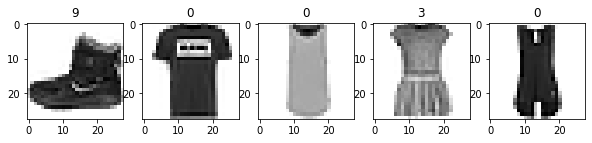

In [22]:
import matplotlib.pyplot as plt
def plot_5_examples(class_names=""):
    plt.figure(figsize=(10,4))
    for i in range(0,5):
        x = X_train[i]; y = y_train[i]
        plt.subplot(151+i); plt.imshow(x, cmap="binary")
        if class_names == "":
            plt.title(f"{y}")
        else:
            plt.title(f"{class_names[y]}")
    plt.show()

plot_5_examples()

So, the 10 classes are:

|Class|Name|
|---|---|
|0|T-shirt/top|
|1|Trouser|
|2|Pullover|
|3|Dress|
|4|Coat|
|5|Sandal|
|6|Shirt|
|7|Sneaker|
|8|Bag|
|9|Ankle boot|

## 2.2 Pre-process data

&#9989; **<font color=blue>DO THIS:</font>** Since we are using laptop computer for this exercise and most do not have good GPU, we will use only a small subset of the data:

- 2,000 for training

In [23]:
# Split training/validation
X_train = X_train[:2000]
y_train = y_train[:2000]

&#9989; **<font color=blue>DO THIS:</font>** We also need to provide the class names instead of using 0~9. Let's print out the same five examples but with class names as titles.

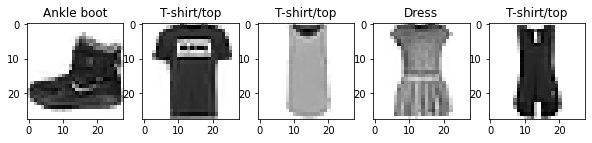

In [24]:
# Specifiy class names
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

plot_5_examples(class_names)

---
<a name="model"></a>
# 3 Building an ANN classification model

## 3.1 Creating ANN model as a class

&#9989; **<font color=blue>DO THIS:</font>** In the cell below, we will create a base model with 4 layers as a class object. Except the 1st, input layer, which is a `Flatten` layer (28x28 --> 784x1), the rest are all linear layers, which in its simplest form take two paramters `nn.Linear(num_input_nodes, num_output_nodes)`:
- `num_input_nodes` is the number of nodes in the previous layer, `num_output_nodes` is the number of nodes in the current layer.
  - Let's have 300, 100, and 10 for the 2nd, 3rd, and 4th layers, respectively.
-  Let's use the [`relu`](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)) activation function for the 2nd, the 3rd and the 4th layers.
-  Because we are doing image classification, we have to append a [`softmax`](https://en.wikipedia.org/wiki/Softmax_function) layer at the end of the network to convert the output into a vector of probabilities that shows how likely the current image is in each of the classes. The predicted label would then be the class with the highest probability. For some historical reason, instead of just using the `softmax` function, we use the logrithm of it, which is essentially the same, as it does not change the ranking of the probabilities. 

In the code cell below, fill in the parameters and missing comments based on the above.

In [25]:
import torch.nn as nn
import torch.nn.functional as F
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784,300)
        self.fc2 = nn.Linear(300,100)
        self.fc3 = nn.Linear(100,10)
    
        
    def forward(self,x):
        x = x.view(x.shape[0],-1) ## What does this line do?
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(x,dim=1) ## What does this line do?
        return x

&#9989; **<font color=blue>DO THIS:</font>** Run the following command that constructs an object from the network class we just defined (so we have an actual, untrained network!).

In [26]:
net = Classifier() 

&#9989; **<font color=blue>DO THIS:</font>** Run the following command that summarizes the structure of the network you just created. 

In [27]:
net.parameters

<bound method Module.parameters of Classifier(
  (fc1): Linear(in_features=784, out_features=300, bias=True)
  (fc2): Linear(in_features=300, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)>

&#9989; **<font color=blue>DO THIS:</font>** Run the following command that prints out all the weights and bias of the network. At this stage, the weights and bias are just randomly initialized. 


In [28]:
for parms in net.parameters():
    print(parms)
    

      

Parameter containing:
tensor([[-6.6823e-03,  1.4502e-02,  1.4385e-02,  ..., -1.0087e-03,
          4.6113e-03, -1.7971e-02],
        [ 1.9398e-02,  2.3518e-02,  3.5897e-03,  ..., -3.4781e-04,
          2.7768e-02,  8.6056e-03],
        [-3.3750e-02,  1.8662e-02, -2.3105e-02,  ...,  2.3121e-02,
          1.4909e-03, -2.8221e-03],
        ...,
        [ 7.1146e-05, -2.3375e-02, -2.2339e-02,  ..., -2.4629e-03,
          3.1101e-02,  1.1378e-02],
        [-3.5300e-02, -3.1327e-03, -2.1000e-02,  ...,  2.6688e-02,
         -1.3850e-02,  1.2449e-02],
        [ 5.7448e-03,  2.5029e-02,  2.8096e-02,  ..., -2.1718e-02,
         -2.5011e-02, -1.0946e-02]], requires_grad=True)
Parameter containing:
tensor([ 0.0188, -0.0334,  0.0354,  0.0343,  0.0286,  0.0286, -0.0128, -0.0318,
        -0.0261,  0.0040,  0.0211, -0.0343, -0.0087,  0.0240, -0.0246,  0.0238,
         0.0107,  0.0084,  0.0114,  0.0211,  0.0020,  0.0143,  0.0223, -0.0261,
        -0.0289, -0.0279,  0.0093, -0.0078,  0.0277,  0.0134,  0

&#9989; <font color=red>**QUESTION:**</font> Discuss with your neighbors,  how many parameters (weights+bias) do we have in total?

<font size=+3>&#9998;</font> Replace with your answer to the above question!

##ANSWER##
There is an insane number of parameters:
* Input layer: 784 nodes + 1 bias node (think of bias as intercept)
* 1st hidden: 300 nodes + 1 bias node
  * 235,500 parameters = 784\*300 weights + 1\*300 biases
* 2nd hidden: 100 nodes + 1 bias node
  * 30,100 parameters = 300\*100 weights + 1\*100 biases
* Output layer: 10 nodes (0 to 9)
  * 1010 paramters = 100\*10 weights + 1\*10 biases
  
##ANSWER##

## 3.2 Train the model

Once a model is initiated, the next step is to train it with our taining data. For that we need to do three things:
1. Define a loss/cost function to measure the goodness of prediction
2. Choose a solver that find the optimal value of the weights that either minimize or maximize the loss
3. Use pytorch to run the solver to fit the model

&#9989; **<font color=blue>DO THIS:</font>** Read the following code and make sure you understand what each line is doing 


In [29]:
import torch.optim as optim
net = Classifier() 
criterion = torch.nn.NLLLoss() # pick a metric to measure the goodness of fit 
optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.8,weight_decay =1e-3) # Pick a training algorithm that iteratively minimizes the loss
 # here we picked gradient descent as the training algorithm
epochs = 500  # Set the total number of iterations (called epochs in deep learning)
net.train() # Inform pytorch that training is started. During this stage, weights will be updated.
for e in range(epochs): 
    optimizer.zero_grad()  # clear previously stored gradients if any
    pred = net(X_train) # compute the output of the network given the input data
    loss = criterion(pred,y_train) # compute the difference between the predicted and true labels under the chosen metric
    loss.backward() # compute the gradient of the loss function with respect to the parameters
    optimizer.step()  # perform a gradient descent update
       
    print('Epoch: {} \t Training loss: {:.6f}'.format(e,loss)) #print out the loss

Epoch: 0 	 Training loss: 2.303766
Epoch: 1 	 Training loss: 2.297800
Epoch: 2 	 Training loss: 2.287266
Epoch: 3 	 Training loss: 2.273168
Epoch: 4 	 Training loss: 2.256830
Epoch: 5 	 Training loss: 2.238063
Epoch: 6 	 Training loss: 2.213272
Epoch: 7 	 Training loss: 2.183091
Epoch: 8 	 Training loss: 2.146930
Epoch: 9 	 Training loss: 2.102340
Epoch: 10 	 Training loss: 2.046083
Epoch: 11 	 Training loss: 1.977475
Epoch: 12 	 Training loss: 1.896965
Epoch: 13 	 Training loss: 1.806422
Epoch: 14 	 Training loss: 1.711514
Epoch: 15 	 Training loss: 1.619332
Epoch: 16 	 Training loss: 1.535497
Epoch: 17 	 Training loss: 1.462710
Epoch: 18 	 Training loss: 1.399209
Epoch: 19 	 Training loss: 1.344199
Epoch: 20 	 Training loss: 1.298104
Epoch: 21 	 Training loss: 1.258746
Epoch: 22 	 Training loss: 1.223178
Epoch: 23 	 Training loss: 1.189029
Epoch: 24 	 Training loss: 1.158624
Epoch: 25 	 Training loss: 1.132517
Epoch: 26 	 Training loss: 1.109946
Epoch: 27 	 Training loss: 1.089593
Ep

Epoch: 231 	 Training loss: 0.276384
Epoch: 232 	 Training loss: 0.346616
Epoch: 233 	 Training loss: 0.239883
Epoch: 234 	 Training loss: 0.245642
Epoch: 235 	 Training loss: 0.247074
Epoch: 236 	 Training loss: 0.213179
Epoch: 237 	 Training loss: 0.240283
Epoch: 238 	 Training loss: 0.209877
Epoch: 239 	 Training loss: 0.202292
Epoch: 240 	 Training loss: 0.209482
Epoch: 241 	 Training loss: 0.188967
Epoch: 242 	 Training loss: 0.198690
Epoch: 243 	 Training loss: 0.182815
Epoch: 244 	 Training loss: 0.185181
Epoch: 245 	 Training loss: 0.178448
Epoch: 246 	 Training loss: 0.175780
Epoch: 247 	 Training loss: 0.174437
Epoch: 248 	 Training loss: 0.168709
Epoch: 249 	 Training loss: 0.169748
Epoch: 250 	 Training loss: 0.164638
Epoch: 251 	 Training loss: 0.164974
Epoch: 252 	 Training loss: 0.160916
Epoch: 253 	 Training loss: 0.160760
Epoch: 254 	 Training loss: 0.157879
Epoch: 255 	 Training loss: 0.157253
Epoch: 256 	 Training loss: 0.154958
Epoch: 257 	 Training loss: 0.154100
E

Epoch: 461 	 Training loss: 0.121713
Epoch: 462 	 Training loss: 0.140220
Epoch: 463 	 Training loss: 0.156002
Epoch: 464 	 Training loss: 0.231912
Epoch: 465 	 Training loss: 0.156028
Epoch: 466 	 Training loss: 0.122020
Epoch: 467 	 Training loss: 0.105007
Epoch: 468 	 Training loss: 0.116290
Epoch: 469 	 Training loss: 0.121737
Epoch: 470 	 Training loss: 0.104973
Epoch: 471 	 Training loss: 0.100407
Epoch: 472 	 Training loss: 0.105301
Epoch: 473 	 Training loss: 0.102533
Epoch: 474 	 Training loss: 0.097272
Epoch: 475 	 Training loss: 0.094301
Epoch: 476 	 Training loss: 0.094848
Epoch: 477 	 Training loss: 0.095899
Epoch: 478 	 Training loss: 0.094058
Epoch: 479 	 Training loss: 0.091656
Epoch: 480 	 Training loss: 0.088777
Epoch: 481 	 Training loss: 0.087562
Epoch: 482 	 Training loss: 0.087325
Epoch: 483 	 Training loss: 0.086744
Epoch: 484 	 Training loss: 0.085936
Epoch: 485 	 Training loss: 0.084750
Epoch: 486 	 Training loss: 0.083561
Epoch: 487 	 Training loss: 0.082444
E

&#9989; <font color=blue>**DO THIS:**</font> The metric `torch.nn.NLLLoss()` we picked computes the so-called cross entropy loss. Read [online](https://towardsdatascience.com/what-is-cross-entropy-3bdb04c13616) to learn what it is. Put the formula you saw for the cross entropy loss below.


<font size=+3>&#9998;</font> Replace with your answer to the above question!

&#9989; <font color=red>**QUESTION:**</font> Based on the output of the training, do you think the number of iterations we set is enough for the training loss to reach its minimum? If not, try to increase the number of epochs to a more suitable value.  

<font size=+3>&#9998;</font> Replace with your answer to the above question!

<font size=+3>&#9998;</font> Put your answer to the above question here

## 3.3 Evaluate model with test cases

&#9989; **<font color=blue>DO THIS:</font>** Let's define the `evaluate` function to see how good the model is.

In [30]:
def model_evaluate(net, X_test,y_test):
      pred_prob = net(X_test.float())
      corrects = 0
      for i in range(len(pred_prob)):
            pred_label = pred_prob[i].argmax()
            if pred_label == y_test[i]:
                corrects += 1
      return corrects/len(pred_prob)

print(f'test accuracy {model_evaluate(net,X_test,y_test)}')


test accuracy 0.8173


&#9989; <font color=red>**QUESTION:**</font> What is the prediction accuracy on the test dataset?

<font size=+3>&#9998;</font> 81.73%

&#9989; **<font color=blue>DO THIS:</font>** To get a better understanding of the code above, let's dig into the details of the evaluation process. Comment on the specified lines.

In [31]:
# Comment: what is in y_pred_prob? => it stores the output values of all 10 categories
y_pred_prob = net(X_test)

# Comment: what do the values in the first record of y_pred_prob mean? 
# => outputs for log spftmax functions
y_pred_prob[0]

tensor([-9.3263, -9.3263, -9.3263, -9.3263, -9.3263, -2.7961, -9.0937, -2.5640,
        -3.0167, -0.2077], grad_fn=<SelectBackward0>)

In [32]:
# Comment: what is in y_test_classes? => get the max value and append it to the respective class
y_pred_class = torch.max(y_pred_prob,axis=1)[1]

y_pred_class_names = np.array(class_names)[y_pred_class]           

In [33]:
y_pred_class_names

array(['Ankle boot', 'Pullover', 'Trouser', ..., 'Bag', 'Trouser',
       'Sandal'], dtype='<U11')

In [34]:
y_pred_class_names

array(['Ankle boot', 'Pullover', 'Trouser', ..., 'Bag', 'Trouser',
       'Sandal'], dtype='<U11')

&#9989; **<font color=blue>DO THIS:</font>** From the above, you have `y_pred_class` which are the predicted class labels of all test instances. In the meantime, their true class labels are in `y_test`.

Write code that will generate a numpy array as `confusion_matrix` where `y_pred_class` are  rows and `y_test` are columns. For example, say we have 2 classes (class 0 and class 1), each with 100 true cases:
- Among 80 cases predicted as class 0, 70 of them are truly class 0, but 10 are truly class 1.
- Among 120 cases predicted as class 1, 100 of them are truly class 1 but 20 are truly class 0.

In this case, the confusion matrix should look like:

| |0|1|
|---|---|---|
|0|70|10|
|1|20|100|

Print out your confusion matrix.


In [35]:
# put your code here
conf_matrix = np.zeros(shape=(len(class_names),len(class_names)))

for i in range(len(y_pred_class)):
    var1 = int(y_test[i])
    var2 = int(y_pred_class[i])
    if y_pred_class[i]==y_test[i]:
        conf_matrix[var2][var2] = conf_matrix[var2][var2]+1
    else:
        conf_matrix[var2][var1] = conf_matrix[var2][var1]+1
        



In [36]:
import pandas as pd
conf_matrix = pd.DataFrame(conf_matrix)
conf_matrix.columns = [0,1,2,3,4,5,6,7,8,9]
conf_matrix

0      1      2      3      4      5      6      7      8      9
0  779.0    3.0   13.0   53.0    0.0    2.0  130.0    0.0    3.0    0.0
1    7.0  950.0    3.0   23.0    3.0    0.0    4.0    0.0    1.0    1.0
2   26.0    6.0  689.0   27.0  105.0    1.0  106.0    0.0   11.0    0.0
3   35.0   32.0   11.0  816.0   39.0    2.0   39.0    0.0    6.0    0.0
4    4.0    4.0  147.0   33.0  699.0    0.0  106.0    0.0    8.0    0.0
5    3.0    0.0    0.0    0.0    0.0  881.0    1.0   36.0    9.0   17.0
6  130.0    4.0  127.0   44.0  144.0    3.0  595.0    0.0   31.0    3.0
7    1.0    0.0    0.0    0.0    0.0   67.0    0.0  913.0   10.0   48.0
8   15.0    1.0   10.0    4.0   10.0    8.0   19.0    1.0  921.0    1.0
9    0.0    0.0    0.0    0.0    0.0   36.0    0.0   50.0    0.0  930.0

&#9989; **<font color=blue>DO THIS:</font>** Let's plot your confusion matrix as a heatmap.

To better emphasize mis-predictions, let's plot the log-transformed confusion matrix.

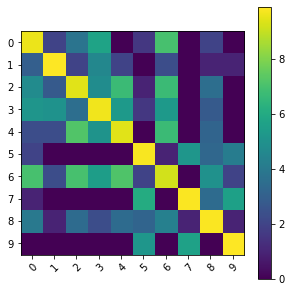

In [38]:
confusion_matrix_logged = np.log2(conf_matrix+1)

flg, ax = plt.subplots(figsize=(5,5))
heatmap = ax.imshow(confusion_matrix_logged, cmap='viridis')
ax.set_xticks(np.arange(len(class_names)))
ax.set_yticks(np.arange(len(class_names)))
plt.colorbar(heatmap)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.show()

&#9989; <font color=red>**QUESTION:**</font> Discuss with your neighbors, which class is the worse predicted? How can we improve the model further?

<font size=+3>&#9998;</font> 
Class 2, Class 4, Class 5 are worse predicted

---
<a name="together"></a>
# 4 Putting things together

&#9989; **<font color=blue>DO THIS:</font>** Write code that create a function called `run_fashion_mnist` that:
- Take `X_train`, `y_train` as parameters.
- Create a four layer model where 2nd and 3rd layers have 150 and 50 nodes, respectively. Otherwise, the rest of the parameters are the same.
- Use the same parameters to compile the model, except the learning rate is set to 0.01.
- Use the same parameters to train the model, except the epochs is set to  600.
- Generate a plot the same as the one in section 3.3.

Is the results better or worse?

In [ ]:
# put your code here



&#9989; <font color=red>**QUESTION:**</font> An important parameter we have set is learning rate:

```Python
optimizer = optim.SGD(net.parameters(), lr=0.1)
```

Currently, it is 0.1. Make the learning rate one magnitude larger or one magnitude smaller, what are the impacts of these learning rates? 

<font size=+3>&#9998;</font> Put your answer to the above question here

-----
### Congratulations, we're done!